## CA04

In [70]:
#Importing packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import xgboost as xgb
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.model_selection import KFold

In [2]:
print(sklearn.__version__)

1.0.2


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
Census = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CA04/census_data.csv') #loading in data

In [5]:
Census.head(5)

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [7]:
features = ['age_bin', 'capital_gl_bin', 'education_bin','hours_per_week_bin', 'msr_bin', 'occupation_bin', 'race_sex_bin','education_num_bin'] #setting features
x_features = Census[features] #storing features
y_target = Census.y

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size=0.3, random_state = 1)#splitting between train and test sets

In [9]:
Ord_Encoder = preprocessing.OrdinalEncoder()

In [10]:
Ord_Encoder.fit(x_test) #encoding labels
x_test = Ord_Encoder.transform(x_test)
x_test = pd.DataFrame(x_test)


Ord_Encoder.fit(x_train)
x_train = Ord_Encoder.transform(x_train)
x_train = pd.DataFrame(x_train)

In [31]:
x_test.head(5)

,0,1,2,3,4,5,6,7
0,1.0,0.0,2.0,3.0,1.0,2.0,2.0,2.0
1,0.0,0.0,2.0,3.0,0.0,4.0,2.0,2.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0
4,2.0,0.0,1.0,4.0,2.0,2.0,2.0,1.0


# Random Forest

In [71]:
clf = RandomForestClassifier() #implementing Random Forrest Classifier

clf = clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

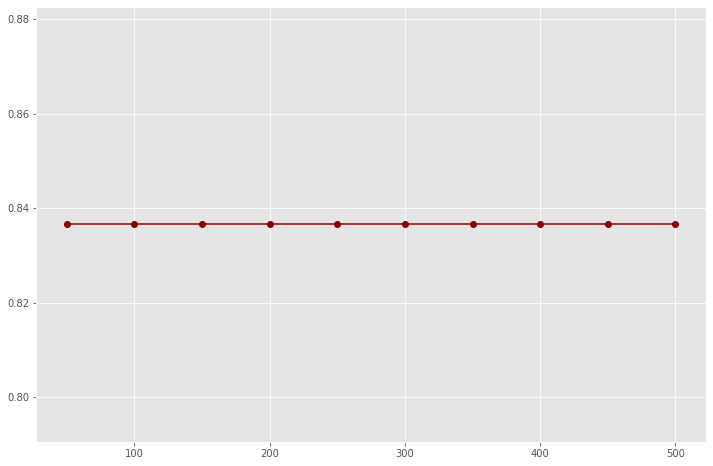

In [72]:
#Finding Optimal Value of a key Hyper-parameter
results = []
max_depth_options = [50,100,150,200,250,300,350,400,450,500]
for trees in max_depth_options:
  model = RandomForestClassifier(max_depth=trees, random_state=101)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  accuracy = np.mean(y_test==y_pred)
  results.append(accuracy)
plt.figure(figsize=(12,8))
pd.Series(results, max_depth_options).plot(color="darkred",marker="o")

In [73]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred)) #Accuracy of model

Accuracy: 0.8365522418617348


In [74]:
# Area under the ROC curve

roc_auc_score(y_test, y_pred)

0.7450602733099009

# Adaboost

In [56]:
adaclf = AdaBoostClassifier(base_estimator=clf,
                            n_estimators=500,
                            learning_rate=0.5,
                            algorithm='SAMME.R',
                            random_state=101)

adaclf.fit(x_train, y_train)

adaclf_train_sc = accuracy_score(y_train, adaclf.predict(x_train))
adaclf_test_sc = accuracy_score(y_test, adaclf.predict(x_test))
print('AdaBoost train/test accuracies %.3f/%.3f' % (adaclf_train_sc, adaclf_test_sc)) #Implementing Adaboost and getting accuracy

AdaBoost train/test accuracies 0.863/0.837


In [57]:
roc_auc_score(y_test, y_pred) #AUC for Adaboost

0.7485991909669588

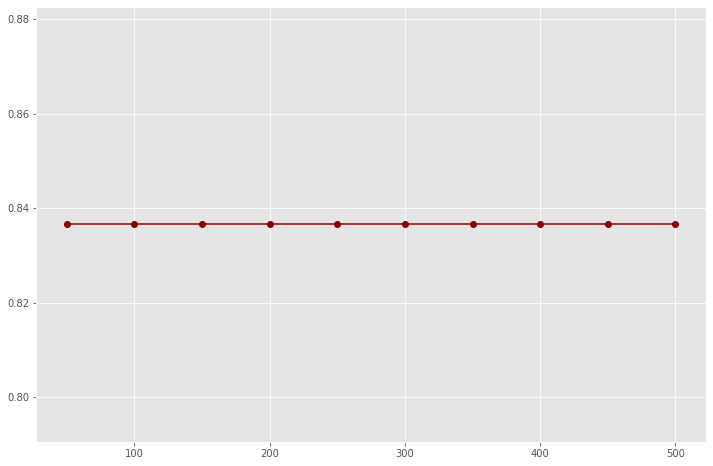

In [58]:
results = []
max_depth_options = [50,100,150,200,250,300,350,400,450,500]
for trees in max_depth_options:
  model = AdaBoostClassifier(base_estimator=clf,
                            n_estimators=500,
                            learning_rate=0.5,
                            algorithm='SAMME.R',
                            random_state=101)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  accuracy = np.mean(y_test==y_pred)
  results.append(accuracy)
plt.figure(figsize=(12,8))
pd.Series(results, max_depth_options).plot(color="darkred",marker="o")

# GradientBoost

In [66]:
gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=101,max_features=8) #Implementing GradientBoost

gbc.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=8, n_estimators=500,
                           random_state=101)

In [68]:
print("GBC accuracy is %2.2f" % accuracy_score( 
     y_test, gbc.predict(x_test))) #Getting accuracy for GradientBoost

GBC accuracy is 0.84


In [69]:
roc_auc_score(y_test, y_pred) #AUC for GradientBoost

0.7569770109749336

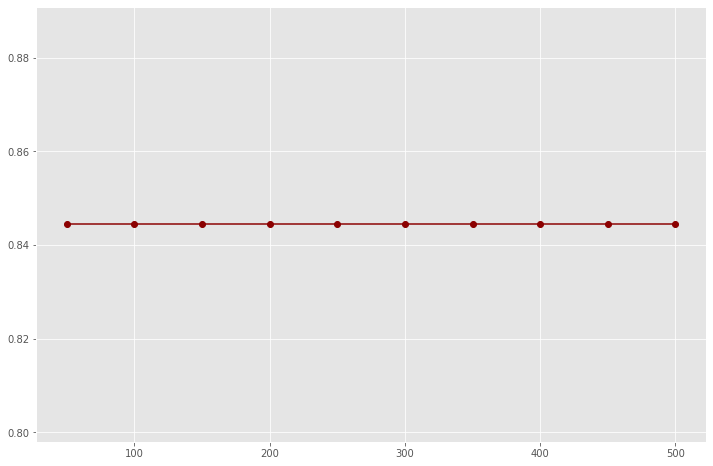

In [62]:
results = []
max_depth_options = [50,100,150,200,250,300,350,400,450,500]
for trees in max_depth_options:
  model = GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=101,max_features=8)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  accuracy = np.mean(y_test==y_pred)
  results.append(accuracy)
plt.figure(figsize=(12,8))
pd.Series(results, max_depth_options).plot(color="darkred",marker="o")

# XGB

In [63]:
xg_class = xgb.XGBClassifier(max_depth=10, n_estimators=500, n_splits=5, random_state=101) #Implementing XGB

In [64]:
# Initialize the KFold parameters
kfold = KFold(n_splits=5, random_state=7, shuffle=True)
# Perform K-Fold Cross Validation
results = cross_val_score(xg_class, x_train, y_train, cv=kfold)
# Print the average results
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100)) 

Accuracy: 83.66% (0.50%)


In [65]:
roc_auc_score(y_test, y_pred) #AUC for XGB

0.7569770109749336

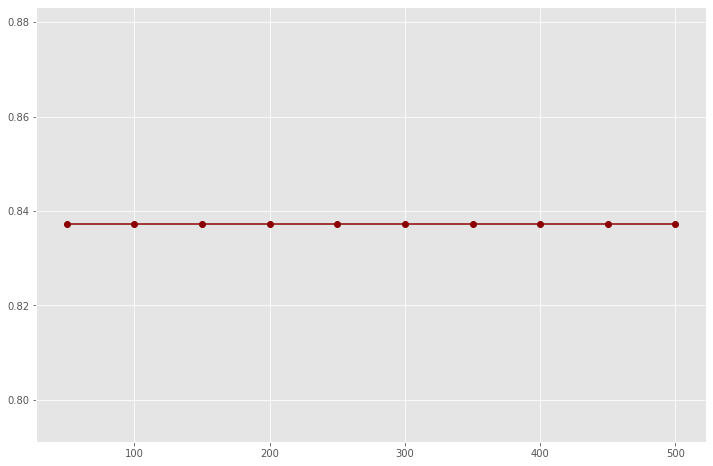

In [54]:
results = []
max_depth_options = [50,100,150,200,250,300,350,400,450,500]
for trees in max_depth_options:
  model = xgb.XGBClassifier(max_depth=10, n_estimators=500, n_splits=5, random_state=7)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  accuracy = np.mean(y_test==y_pred)
  results.append(accuracy)
plt.figure(figsize=(12,8))
pd.Series(results, max_depth_options).plot(color="darkred",marker="o")